# Generate random graphs with large and small largest eigenvalues

Try different values of $p$, generate random graphs with $n=50$ vertices, and identify the ones with the largest and smallest largest eigenvalues.

In [1]:
import numpy as np
from scipy.linalg import eigh
import random

random.seed(42)

In [2]:
def largest_eigenvalue(adj: np.array) -> float:
    n = adj.shape[0]
    w = eigh(adj, eigvals_only=True, subset_by_index=[n - 1, n - 1])
    return np.real(w)[0]


def generate_matrix(n: int, p: float) -> np.array:
    data = [[0 for _ in range(n)] for __ in range(n)]
    for i in range(n - 1):
        for j in range(i + 1, n):
            if random.random() < p:
                data[i][j] = 1
                data[j][i] = 1
    return np.array(data).reshape(n, -1)


def eval_random_graphs(n: int, p: float, trials: int) -> dict:
    result = {
        "largest_value": None,
        "largest_matrix": None,
        "smallest_value": None,
        "smallest_matrix": None
    }
    for t in range(trials):
        adj = generate_matrix(n, p)
        leig = largest_eigenvalue(adj)
        lv = result.get("largest_value")
        if lv is None or leig > lv:
            result["largest_value"] = leig
            result["largest_matrix"] = adj.copy()
        sv = result.get("smallest_value")
        if sv is None or leig < sv:
            result["smallest_value"] = leig
            result["smallest_matrix"] = adj.copy()
    return result

In [6]:
N = 50
TRIALS = 200
MIN_P = 25
MAX_P = 85

overall_result = {
    "largest_p": None,
    "largest_value": None,
    "largest_matrix": None,
    "smallest_p": None,
    "smallest_value": None,
    "smallest_matrix": None
}

for i in range(MIN_P, MAX_P, 5):
    p = float(i) / 100
    ext = eval_random_graphs(N, p, TRIALS)
    lval = ext["largest_value"]
    if overall_result["largest_value"] is None or lval > overall_result["largest_value"]:
        overall_result["largest_p"] = p
        overall_result["largest_value"] = lval
        overall_result["largest_matrix"] = ext["largest_matrix"]
    sval = ext["smallest_value"]
    if overall_result["smallest_value"] is None or sval < overall_result["smallest_value"]:
        overall_result["smallest_p"] = p
        overall_result["smallest_value"] = sval
        overall_result["smallest_matrix"] = ext["smallest_matrix"]

In [7]:
overall_result["largest_p"], overall_result["largest_value"]

(0.8, 40.75961388303609)

In [8]:
overall_result["smallest_p"], overall_result["smallest_value"]

(0.25, 11.155582812478384)

In [9]:
import igraph

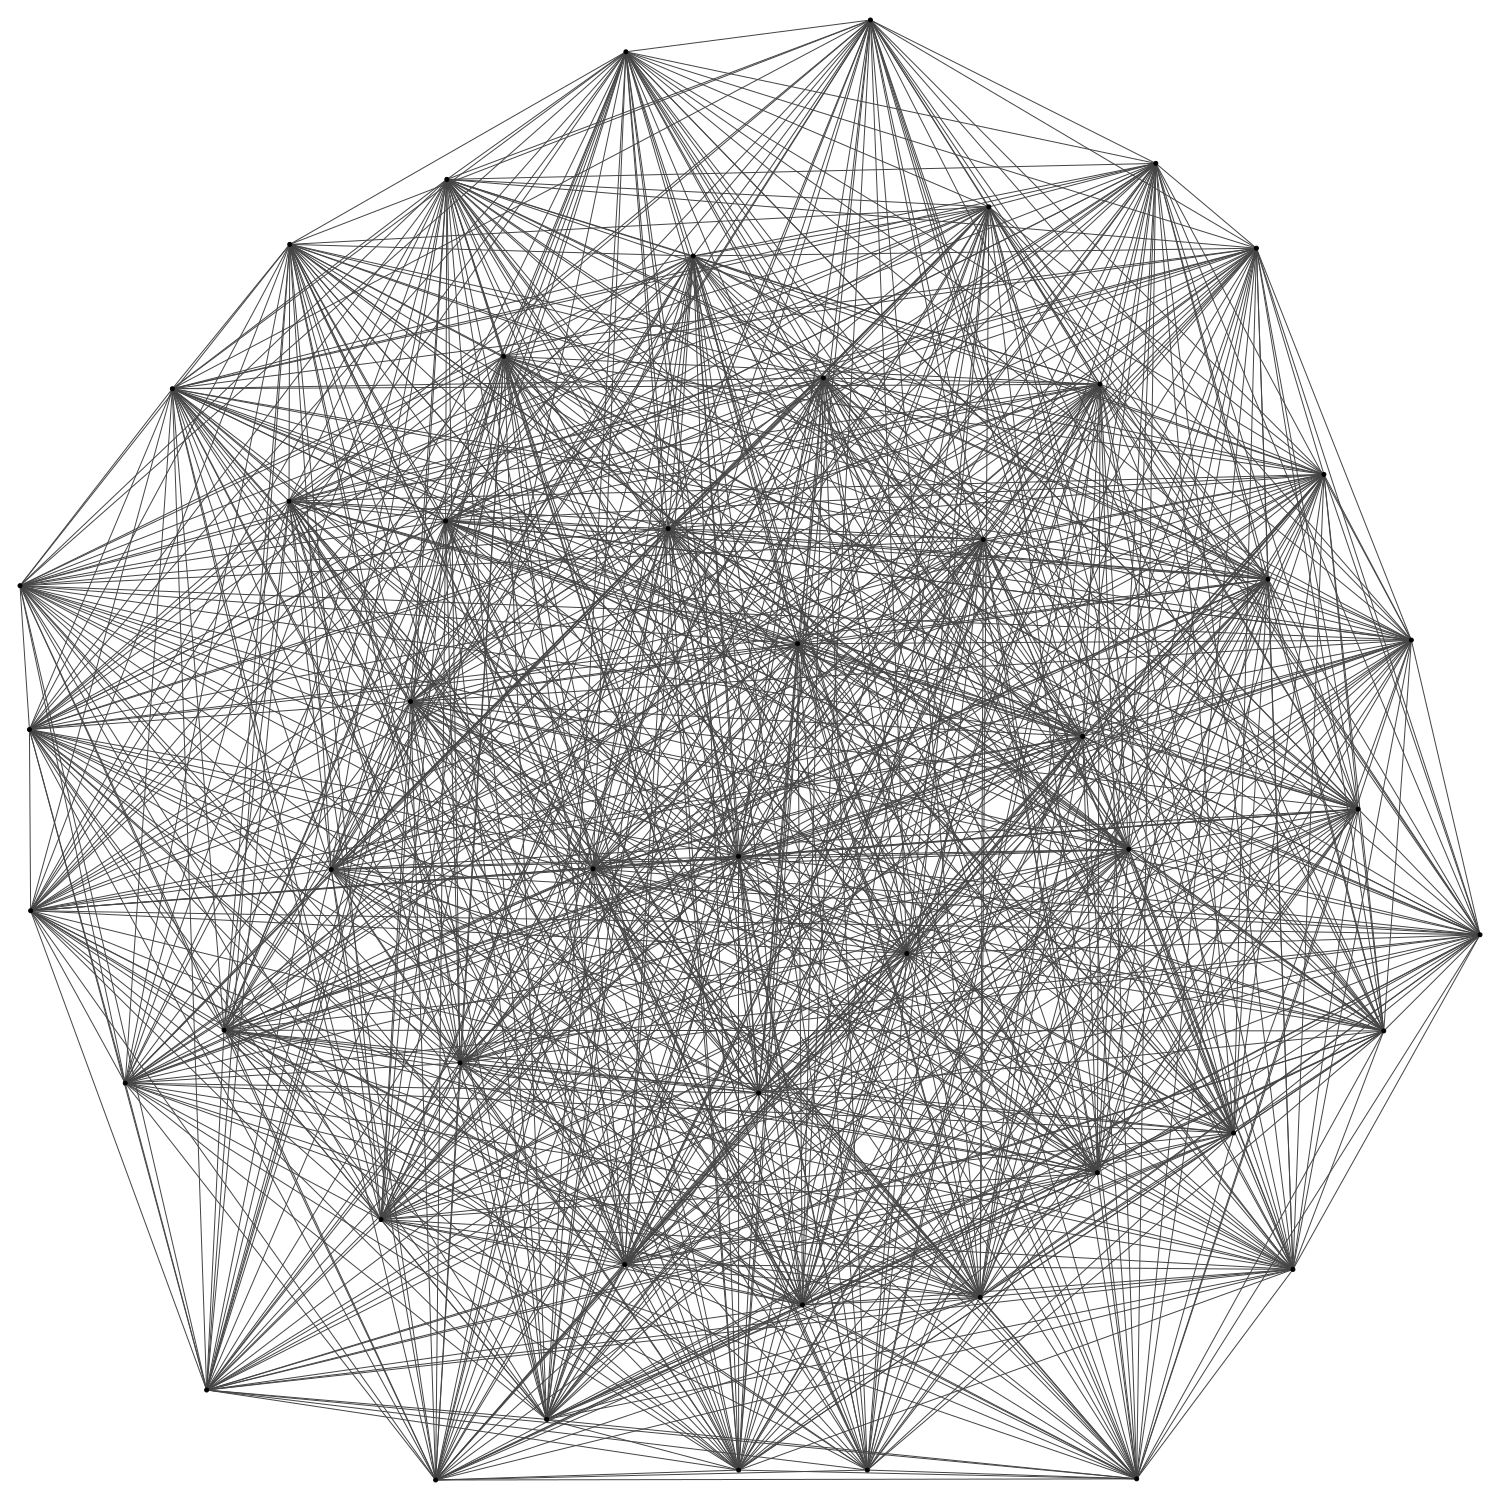

In [10]:
G_largest = igraph.Graph.Adjacency(overall_result["largest_matrix"] > 0, mode="undirected")
#G_largest.vs["label"] = [f"V{i:02d}" for i in range(N)]
igraph.plot(G_largest, bbox=(1500, 1500), vertex_size=4, vertex_color="black")

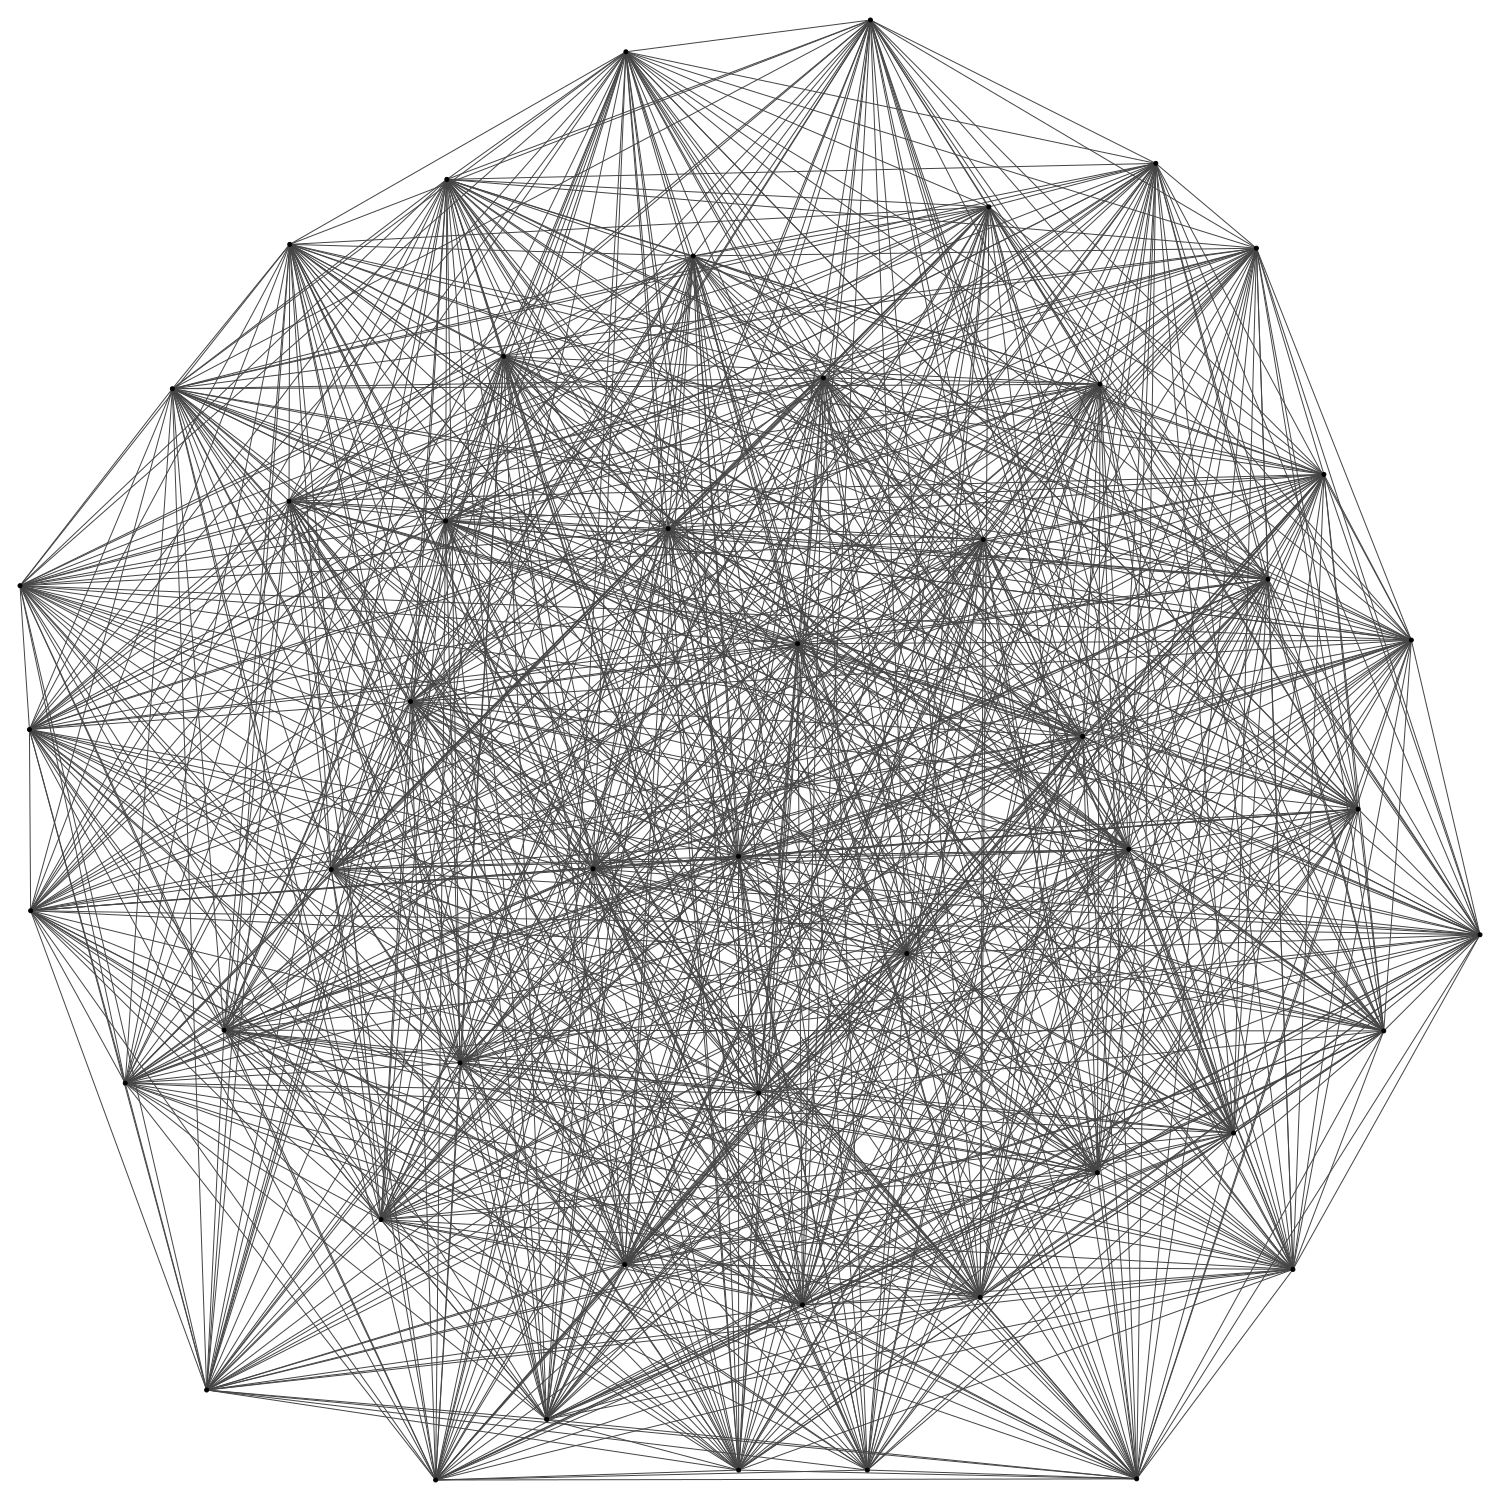

In [11]:
igraph.plot(G_largest, "../fig/random-largest-50.ps", bbox=(1500, 1500), vertex_size=4, vertex_color="black")

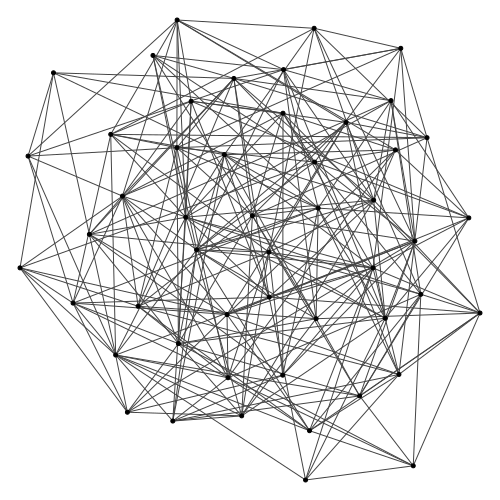

In [12]:
G_smallest = igraph.Graph.Adjacency(overall_result["smallest_matrix"] > 0, mode="undirected")
#G_smallest.vs["label"] = [f"V{i:02d}" for i in range(N)]
igraph.plot(G_smallest, bbox=(500, 500), vertex_size=4, vertex_color="black")

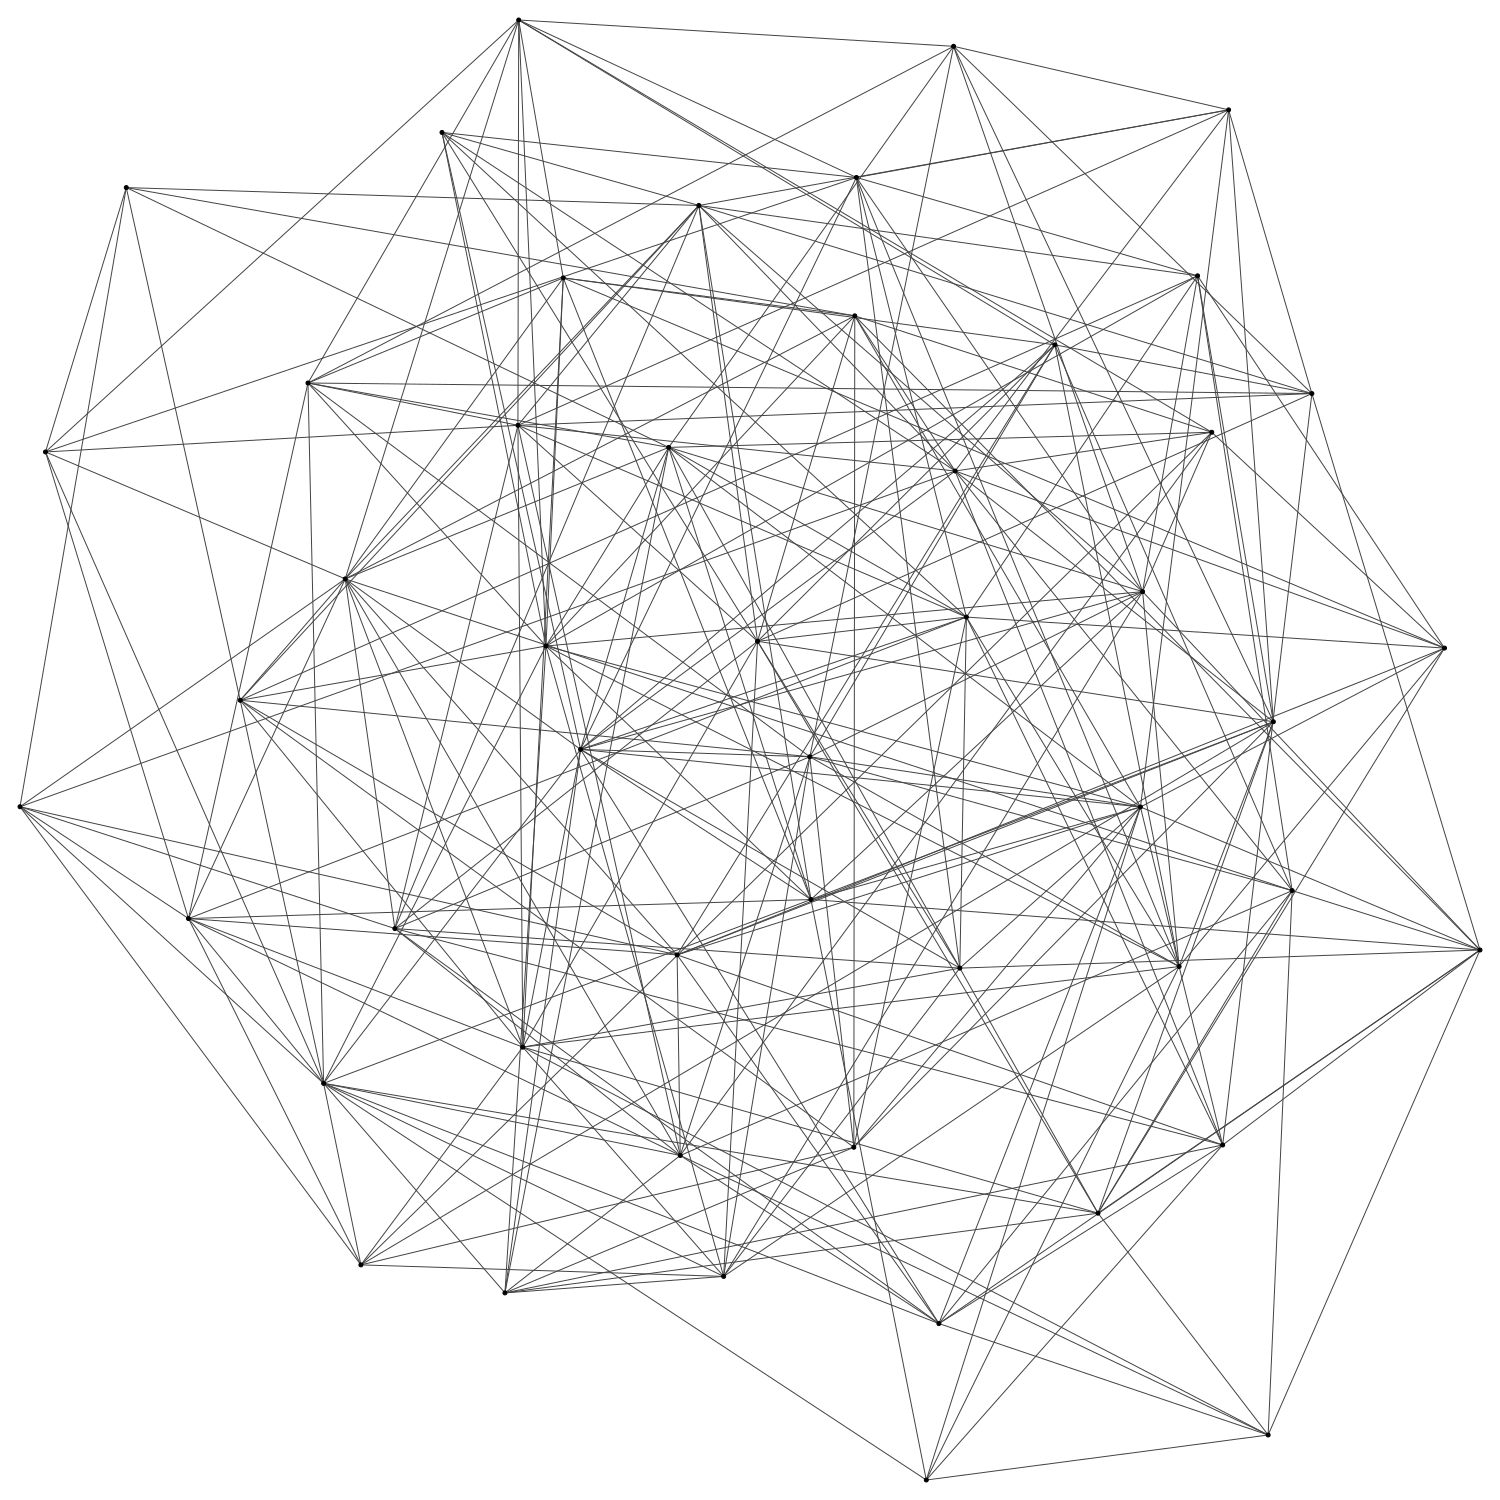

In [13]:
igraph.plot(G_smallest, "../fig/random-smallest-50.ps", bbox=(1500, 1500), vertex_size=4, vertex_color="black")

In [14]:
print(len(G_smallest.clusters()))

1


In [15]:
G_largest.write_gml("/home/rkingan/winhome/Documents/dev/src/sandra-math5001-2022/random-largest-50.gml")
G_smallest.write_gml("/home/rkingan/winhome/Documents/dev/src/sandra-math5001-2022/random-smallest-50.gml")

In [16]:
len(G_smallest.es), len(G_largest.es)

(264, 1015)